In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Desktop/cvet.csv')

In [3]:
print(df.shape)
df.head()

(918, 19)


,Date,Day,Start time,End time,Share 4-7,TVR 4-7,Audience 4-7,Share 4-11,TVR 4-11,Audience 4-11,Share 4-45,TVR 4-45,Audience 4-45,Male Share 4-45,Male TVR 4-45,Male Audience 4-45,Female Share 4-45,Female TVR 4-45,Female Audience 4-45
0,1/13/23,Пятница,5:00:00,5:03:46,11,"0,1","7,6",14,"0,1","20,8","6,5","0,1","73,1","4,1","0,1","23,6","7,1","0,1","28,7"
1,1/13/23,Пятница,5:03:46,5:08:28,"12,6","0,1","7,6","15,5","0,1","20,8","4,8","0,1","66,2","3,8","0,1","23,6","3,4","0,1","21,8"
2,1/13/23,Пятница,5:08:28,5:14:59,"10,1","0,1","7,6","14,1","0,1","20,8","5,1","0,1","72,4","3,4","0,1","23,6","4,8","0,1",28
3,1/13/23,Пятница,5:15:12,5:21:47,"10,8","0,1","7,6","13,3","0,1","21,1","4,6","0,1","68,6","3,4","0,1","23,6","3,7","0,1","23,9"
4,1/13/23,Пятница,5:21:47,5:26:49,"12,1","0,1","7,6","14,9","0,2","22,9","4,7","0,1","73,4","4,2","0,1","28,7","3,1","0,1","21,8"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  918 non-null    object
 1   Day                   918 non-null    object
 2   Start time            918 non-null    object
 3   End time              918 non-null    object
 4   Share 4-7             918 non-null    object
 5   TVR 4-7               918 non-null    object
 6   Audience 4-7          918 non-null    object
 7   Share 4-11            918 non-null    object
 8   TVR 4-11              918 non-null    object
 9   Audience 4-11         918 non-null    object
 10  Share 4-45            918 non-null    object
 11  TVR 4-45              918 non-null    object
 12  Audience 4-45         918 non-null    object
 13  Male Share 4-45       918 non-null    object
 14  Male TVR 4-45         918 non-null    object
 15  Male Audience 4-45    918 non-null    ob

In [5]:
df['Start time'] = pd.to_datetime(df['Date'] + ' ' + df['Start time'], format='mixed')

In [6]:
df['End time'] = pd.to_datetime(df['Date'] + ' ' + df['End time'], format='mixed')
df = df.drop(['Date'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Day                   918 non-null    object        
 1   Start time            918 non-null    datetime64[ns]
 2   End time              918 non-null    datetime64[ns]
 3   Share 4-7             918 non-null    object        
 4   TVR 4-7               918 non-null    object        
 5   Audience 4-7          918 non-null    object        
 6   Share 4-11            918 non-null    object        
 7   TVR 4-11              918 non-null    object        
 8   Audience 4-11         918 non-null    object        
 9   Share 4-45            918 non-null    object        
 10  TVR 4-45              918 non-null    object        
 11  Audience 4-45         918 non-null    object        
 12  Male Share 4-45       918 non-null    object        
 13  Male TVR 4-45       

In [8]:
columns_to_convert = df.drop(['Day','Start time','End time'], axis=1)

for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.').astype(float)


In [9]:
df.drop(['Start time','End time'],axis=1).describe()

,Share 4-7,TVR 4-7,Audience 4-7,Share 4-11,TVR 4-11,Audience 4-11,Share 4-45,TVR 4-45,Audience 4-45,Male Share 4-45,Male TVR 4-45,Male Audience 4-45,Female Share 4-45,Female TVR 4-45,Female Audience 4-45
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.00000,918.000000,918.000000,918.000000
mean,27.338998,1.671024,111.737037,21.920806,1.175054,170.548693,8.209150,0.485839,376.996732,3.777996,0.204575,64.58061,6.802832,0.448148,141.870697
std,8.568733,1.131645,74.320130,6.395153,0.755178,109.611705,2.765456,0.285941,220.169717,2.223998,0.160835,49.37125,2.997544,0.260089,82.057829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,5.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.450000,1.000000,66.000000,18.600000,0.700000,99.525000,6.700000,0.300000,233.500000,2.300000,0.100000,28.20000,4.800000,0.300000,81.400000
50%,27.400000,1.300000,89.850000,21.900000,0.900000,133.950000,8.100000,0.400000,323.950000,3.500000,0.200000,51.40000,6.500000,0.400000,130.450000
75%,33.100000,2.000000,134.100000,26.175000,1.500000,217.650000,9.575000,0.600000,501.025000,4.800000,0.300000,89.07500,8.600000,0.600000,192.175000
max,51.800000,5.800000,385.300000,39.000000,3.600000,520.900000,17.100000,1.500000,1197.600000,11.900000,0.900000,267.50000,16.800000,1.500000,475.300000


In [10]:
df[df['Audience 4-7'] == df['Audience 4-7'].max()]

,Day,Start time,End time,Share 4-7,TVR 4-7,Audience 4-7,Share 4-11,TVR 4-11,Audience 4-11,Share 4-45,TVR 4-45,Audience 4-45,Male Share 4-45,Male TVR 4-45,Male Audience 4-45,Female Share 4-45,Female TVR 4-45,Female Audience 4-45
846,Вторник,2023-11-21 20:48:10,2023-11-21 20:53:19,35.6,5.8,385.3,24.3,3.3,483.1,8.8,1.5,1177.7,4.1,0.7,219.3,8.0,1.5,475.3


In [11]:
df[df['Audience 4-45'] == df['Audience 4-45'].max()]

,Day,Start time,End time,Share 4-7,TVR 4-7,Audience 4-7,Share 4-11,TVR 4-11,Audience 4-11,Share 4-45,TVR 4-45,Audience 4-45,Male Share 4-45,Male TVR 4-45,Male Audience 4-45,Female Share 4-45,Female TVR 4-45,Female Audience 4-45
823,Вторник,2023-11-14 20:53:41,2023-11-14 20:58:25,27.6,4.9,322.7,22.6,3.4,498.1,8.5,1.5,1197.6,4.4,0.7,234.5,7.1,1.5,465.1


In [12]:
df[df['Audience 4-11'] == df['Audience 4-11'].max()]

,Day,Start time,End time,Share 4-7,TVR 4-7,Audience 4-7,Share 4-11,TVR 4-11,Audience 4-11,Share 4-45,TVR 4-45,Audience 4-45,Male Share 4-45,Male TVR 4-45,Male Audience 4-45,Female Share 4-45,Female TVR 4-45,Female Audience 4-45
885,Пятница,2023-12-08 18:28:10,2023-12-08 18:33:01,36.8,5.4,353.2,27.4,3.6,520.9,7.4,1.0,809.6,1.9,0.2,72.8,4.2,0.7,215.9


In [13]:
import matplotlib.pyplot as plt

# зададим параметры рисуемых нами графиков, например, размер
plt.rcParams['figure.figsize'] = (15, 5)

<Axes: >

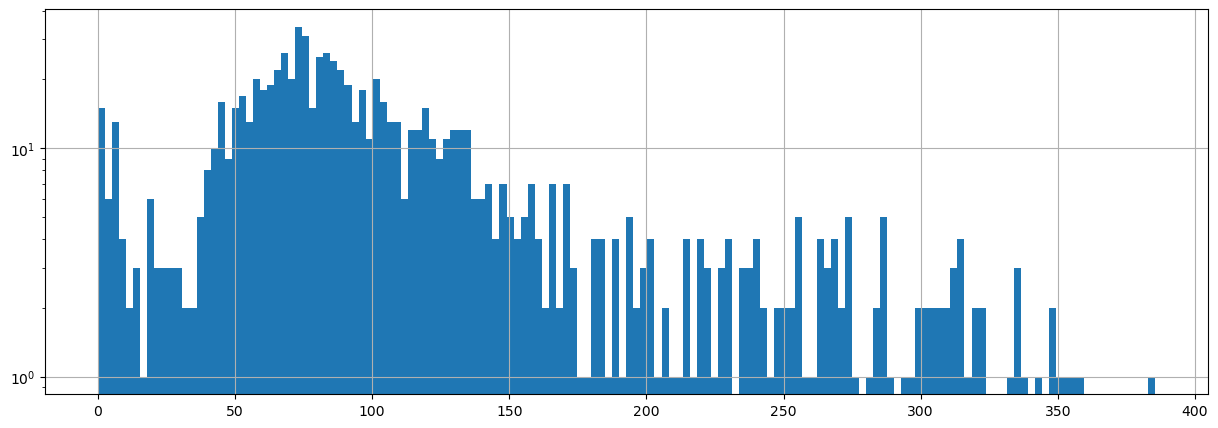

In [14]:
df['Audience 4-7'].hist(bins=150, log=True)

<Axes: >

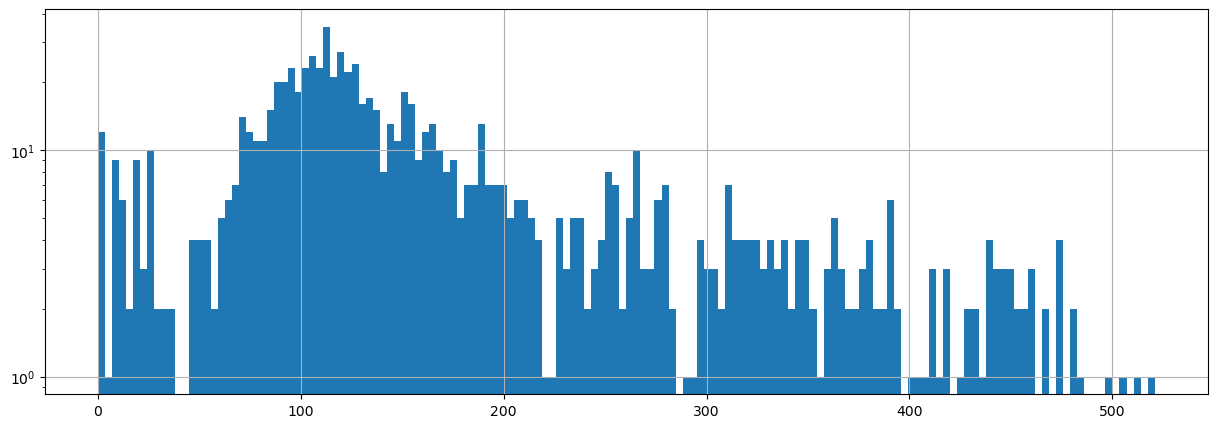

In [15]:
df['Audience 4-11'].hist(bins=150, log=True)

<Axes: >

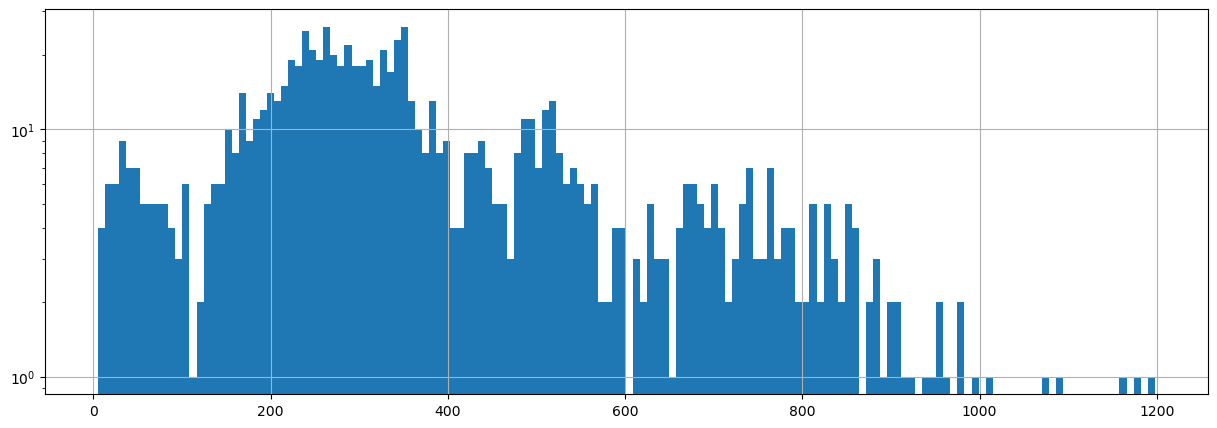

In [16]:
df['Audience 4-45'].hist(bins=150, log=True)

In [17]:
!pip3 install plotly
!pip3 install plotly-express
!pip3 install nbformat>=4.2.0
import pandas as pd
import numpy as np
import pickle

# Модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%config InlineBackend.figure_format = 'svg' # Графики в svg выглядят четче

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

import warnings
warnings.filterwarnings('ignore')

zsh:1: 4.2.0 not found


In [18]:
print("Дни с {} по {}, всего {} дней.".format(min(df['Start time']), 
                                          max(df['Start time']), 
                                          df['Start time'].nunique()))


Дни с 2023-01-13 05:00:00 по 2023-12-22 18:37:42, всего 918 дней.


Text(0, 0.5, 'Название оси Y')

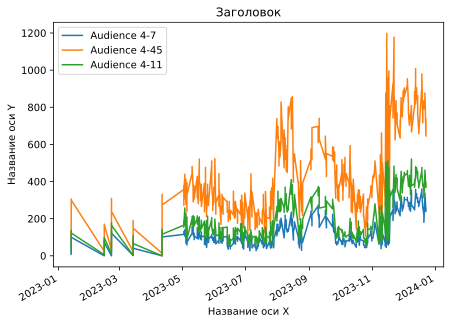

In [19]:
ax = df[['Audience 4-7', 'Audience 4-45','Audience 4-11', 'Start time']].groupby('Start time').sum().plot(title='Заголовок')

ax.set_xlabel("Название оси X")
ax.set_ylabel("Название оси Y") 


In [20]:
!pip3 install folium
import folium
m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)
m

In [22]:
element = html.parse(source)

In [23]:
from lxml import html

source = 'http://games.chruker.dk/eve_online/item.php?type_id=814'
path = '//*[@id="top"]/table[1]/tbody/tr[1]/td[3]/table'

tree = html.parse(source)

result = tree.xpath(path)

print(result)

[<Element table at 0x176c4a3f0>]
